In [1]:
!pip install brayns==0.8.0
!pip install phaneron==0.1.11
!pip install ipywidgets

  Using cached https://files.pythonhosted.org/packages/10/28/43b2e69d62bb984806b1733710516f03b486e101372583fa26652b237a6f/python_jsonschema_objects-0.3.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/21/18/a0de8cda637ba3efee1b3617ded00601507ce15bd70a39399740e0fd415f/semver-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/85/5e/e91792f198bbc5a0d7d3055ad552bc4062942d27eaf75c3e2783cf64eae5/Pillow-5.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c0/4e/fd492e91abdc2d2fcb70ef453064d980688762079397f779758e055f6575/Markdown-3.1.1-py2.py3-none-any.whl
     |████████████████████████████████| 122kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 53.2MB/s eta 0:00:01
     |████████████████████████████████| 143kB 72.3M

     |████████████████████████████████| 512kB 78.9MB/s eta 0:00:01


# Allocate and start Brayns on BB5

# Start scripting!

In [1]:
from brayns import Client, AsyncClient, __version__ as brayns_version
from phaneron import CircuitExplorer, CameraPathHandler, __version__ as phaneron_version

In [2]:
print('brayns:   ' + brayns_version)
print('phaneron: ' + phaneron_version)

brayns:   0.8.0
phaneron: 0.1.11


In [10]:
host = "r1i4n34.bbp.epfl.ch:3863"
brayns = Client(host)
asyncB = await AsyncClient(host)
#circuit_explorer = CircuitExplorer(brayns)

In [11]:
brayns.show()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\…

In [13]:
brayns.set_camera(current="perspective")

True

In [6]:
brayns.snapshot(format="jpeg", size=(320,240))

{'data': '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCADwAUADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD/AD/6KKKACiiigAooooAKKKKACiiigAooooAKKvWml6nqFvql3YadfXtroljHqmtXNpaXFzb6Rpk2p6dosWo6pNDG8en2MusavpOkx3d20Nu+p6pp1gshur22il9S+Gnw2j8V+Mrfwzqem+LvE7v4stfBk+g/B8

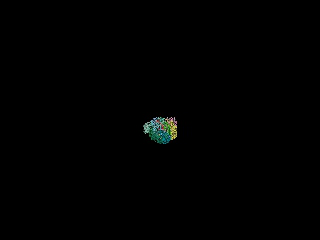

In [21]:
brayns.image(size=(320, 240))

In [8]:
asyncB.image(size=(3200,2400), samples_per_pixel=1000)


In [11]:
await asyncB.set_camera(current="perspective")

True

In [15]:
myType = brayns.PerspectiveCameraParams()


In [ ]:
myType.

In [ ]:
brayns.set_camera_params({
    
})



# Next

In [ ]:
brayns.rockets_client.request()

## Add mouse brain model

In [73]:
brayns.add_model(
    path='/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000000.h5_decimated.off')
brayns.add_model(
    path='/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000009.h5_decimated.off')

{'bounding_box': False,
 'bounds': {'max': [-1.7976931348623157e+308,
   -1.7976931348623157e+308,
   -1.7976931348623157e+308],
  'min': [1.7976931348623157e+308,
   1.7976931348623157e+308,
   1.7976931348623157e+308]},
 'id': 1,
 'metadata': {'faces': '27136', 'meshes': '1', 'vertices': '81408'},
 'name': 'GLIA_000009.h5_decimated',
 'path': '/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000009.h5_decimated.off',
 'transformation': {'rotation': [0.0, 0.0, 0.0, 1.0],
  'rotation_center': [0.0, 0.0, 0.0],
  'scale': [1.0, 1.0, 1.0],
  'translation': [0.0, 0.0, 0.0]},
 'visible': True}

In [77]:
brayns.add_model(
    path='/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000027.h5_decimated.off')

{'bounding_box': False,
 'bounds': {'max': [-1.7976931348623157e+308,
   -1.7976931348623157e+308,
   -1.7976931348623157e+308],
  'min': [1.7976931348623157e+308,
   1.7976931348623157e+308,
   1.7976931348623157e+308]},
 'id': 2,
 'metadata': {'faces': '23820', 'meshes': '1', 'vertices': '71460'},
 'name': 'GLIA_000027.h5_decimated',
 'path': '/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000027.h5_decimated.off',
 'transformation': {'rotation': [0.0, 0.0, 0.0, 1.0],
  'rotation_center': [0.0, 0.0, 0.0],
  'scale': [1.0, 1.0, 1.0],
  'translation': [0.0, 0.0, 0.0]},
 'visible': True}

## List models

In [89]:
for model in brayns.scene.models:
    print(model)
    print()

{'bounding_box': False, 'bounds': {'max': [23.210800170898438, 20.94420051574707, 37.620399475097656], 'min': [-28.133100509643555, -39.931800842285156, -12.681500434875488]}, 'id': 0, 'metadata': {'faces': '27170', 'meshes': '1', 'vertices': '81510'}, 'name': 'GLIA_000001.h5_decimated', 'path': '/gpfs/bbp.cscs.ch/project/proj3/resources/meshes/astrocytes/GLIA_000001.h5_decimated.off', 'transformation': {'rotation': [0.0, 0.0, 0.0, 1.0], 'rotation_center': [0.0, 0.0, 0.0], 'scale': [1.0, 1.0, 1.0], 'translation': [0.0, 0.0, 0.0]}, 'visible': True}



In [56]:
transfo = {'rotation': [0.0, 0.0, 0.0, 1.0], 
           'rotation_center': [0.0, 0.0, 0.0], 
           'scale': [1.0, 1.0, 1.0], 
           'translation': [50.0, 0.0, 0.0]}
brayns.update_model(id=1, transformation=transfo)

True

## Materials

In [96]:
circuit_explorer.set_material_extra_attributes(model_id=1)

'OK'

In [99]:
circuit_explorer.set_material(glossiness=1,
                              opacity=1, 
                              refraction_index=0,
                              model_id=1, 
                              material_id=0, 
                              diffuse_color=(.5,1,.75),
                              shading_mode=circuit_explorer.SHADING_MODE_ELECTRON_TRANSPARENCY)

'OK'

## Shading options

In [ ]:
params = brayns.AdvancedSimulationRendererParams()
params.shadows=1
params.soft_shadows=1
params.pixel_alpha=2
brayns.set_renderer_params(params)

In [49]:
brayns.set_environment_map('/gpfs/bbp.cscs.ch/project/proj3/resources/envmap/0101.jpg')

True

In [ ]:
img = brayns.image(
    format='png', quality=100, samples_per_pixel=16, size=(800,600))

## Add grid

In [ ]:
circuit_explorer.add_grid(colored=True, show_axis=False, opacity=0.5,
    min_value=-20000, max_value=20000, interval=1000)

## Camera path

In [ ]:
control_points = list()

In [ ]:
control_points.append(circuit_explorer.get_camera())

In [ ]:
control_points

In [ ]:
camera_path = CameraPathHandler(control_points, 100, 100)

In [ ]:
camera_path.get_key_frame(10)

In [ ]:
for i in range(camera_path.get_nb_frames()):
#     import time
#     time.sleep(0.1)
    kf = camera_path.get_key_frame(i)
    circuit_explorer.set_camera(origin=kf[0], direction=kf[1], up=kf[2])

## Export movie

In [ ]:
animation_frames=list()
camera_definitions = list()
for i in range(camera_path.get_nb_frames()):
    animation_frames.append(0)
    camera_definitions.append(camera_path.get_key_frame(i))

In [ ]:
brayns.set_application_parameters(viewport=[800,600])

In [ ]:
circuit_explorer.export_frames_to_disk(
    animation_frames=animation_frames, 
    camera_definitions=camera_definitions, 
    path='/gpfs/bbp.cscs.ch/project/proj3/projects/mopro/tmp/normals/', 
    samples_per_pixel=1)

In [ ]:
circuit_explorer.cancel_frames_export()

In [69]:
cam = brayns.get_camera_params()
cam

{'aperture_radius': 0.0,
 'aspect': 2.9767441860465116,
 'enable_clipping_planes': True,
 'focus_distance': 1.0,
 'fovy': 45.0}

In [71]:
brayns.reset_camera()

In [81]:
circuit_explorer.get_focal_distance((.5, .5))

52.1266642916743

In [83]:
brayns.inspect((.5,.5))

{'hit': False, 'position': [0.0, 0.0, 0.0]}

In [92]:
params = dict()
params['id'] = 0
brayns.rockets_client.request('getMaterialIds', params=params)


{'ids': [0, 18446744073709551614, 18446744073709551615]}